In [2]:
# ruff: noqa: F401, E402, T201, T203, D103, B015, B018
from __future__ import annotations

import secrets

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
from numpy import ma

InteractiveShell.ast_node_interactivity = "all"

## Sys Info


In [3]:
np.lib.NumpyVersion(np.__version__)
np.show_config("dicts")

NumpyVersion(1.26.4)

{'Compilers': {'c': {'name': 'gcc',
   'linker': 'ld.bfd',
   'version': '10.2.1',
   'commands': 'cc',
   'args': '-fno-strict-aliasing',
   'linker args': '-Wl,--strip-debug, -fno-strict-aliasing'},
  'cython': {'name': 'cython',
   'linker': 'cython',
   'version': '3.0.8',
   'commands': 'cython'},
  'c++': {'name': 'gcc',
   'linker': 'ld.bfd',
   'version': '10.2.1',
   'commands': 'c++',
   'linker args': '-Wl,--strip-debug'}},
 'Machine Information': {'host': {'cpu': 'x86_64',
   'family': 'x86_64',
   'endian': 'little',
   'system': 'linux'},
  'build': {'cpu': 'x86_64',
   'family': 'x86_64',
   'endian': 'little',
   'system': 'linux'}},
 'Build Dependencies': {'blas': {'name': 'openblas64',
   'found': True,
   'version': '0.3.23.dev',
   'detection method': 'pkgconfig',
   'include directory': '/usr/local/include',
   'lib directory': '/usr/local/lib',
   'openblas configuration': 'USE_64BITINT=1 DYNAMIC_ARCH=1 DYNAMIC_OLDER= NO_CBLAS= NO_LAPACK= NO_LAPACKE= NO_AFFINITY=1

In [4]:
np.show_runtime()

[{'numpy_version': '1.26.4',
  'python': '3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]',
  'uname': uname_result(system='Linux', node='Q', release='5.15.146.1-microsoft-standard-WSL2', version='#1 SMP Thu Jan 11 04:09:03 UTC 2024', machine='x86_64')},
 {'simd_extensions': {'baseline': ['SSE', 'SSE2', 'SSE3'],
                      'found': ['SSSE3',
                                'SSE41',
                                'POPCNT',
                                'SSE42',
                                'AVX',
                                'F16C',
                                'FMA3',
                                'AVX2'],
                      'not_found': ['AVX512F',
                                    'AVX512CD',
                                    'AVX512_KNL',
                                    'AVX512_KNM',
                                    'AVX512_SKX',
                                    'AVX512_CLX',
                                    'AVX512_CNL',
             

In [2]:
np.finfo(np.float16)  # float316
np.finfo(np.float16).eps
1 + np.finfo(np.float16).eps
np.finfo(np.float32)  # float32
np.finfo(np.float32).eps
1 + np.finfo(np.float32).eps
np.finfo(np.double)  # float64
np.finfo(np.double).eps
1 + np.finfo(np.double).eps
np.finfo(np.longdouble)  # float80
np.finfo(np.longdouble).eps
1 + np.finfo(np.longdouble).eps

finfo(resolution=0.001, min=-6.55040e+04, max=6.55040e+04, dtype=float16)

0.000977

1.0009765625

finfo(resolution=1e-06, min=-3.4028235e+38, max=3.4028235e+38, dtype=float32)

1.1920929e-07

1.0000001192092896

finfo(resolution=1e-15, min=-1.7976931348623157e+308, max=1.7976931348623157e+308, dtype=float64)

2.220446049250313e-16

1.0000000000000002

finfo(resolution=1e-18, min=-1.189731495357231765e+4932, max=1.189731495357231765e+4932, dtype=float128)

1.084202172485504434e-19

1.0000000000000000001

In [222]:
np.iinfo(int)
np.iinfo(np.longlong)
np.iinfo(np.intp)
np.iinfo(np.uint)

iinfo(min=-9223372036854775808, max=9223372036854775807, dtype=int64)

iinfo(min=-9223372036854775808, max=9223372036854775807, dtype=int64)

iinfo(min=-9223372036854775808, max=9223372036854775807, dtype=int64)

iinfo(min=0, max=18446744073709551615, dtype=uint64)

In [121]:
np.inf

inf

inf

True

## Array Creation


In [259]:
a = np.array([[1, 2, 3], [4, 5, 6]])
a
a.flags
a.shape
a.strides
a.ndim
a.size
a.itemsize
a.nbytes
a.dtype
type(a)

array([[1, 2, 3],
       [4, 5, 6]])

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False

(2, 3)

(24, 8)

2

6

8

48

dtype('int64')

numpy.ndarray

In [2]:
a = np.array([[1, 2, 3], [4, 5, 6]], dtype=np.int16)
a
a.ndim
a.shape
a.dtype
a.size
a.itemsize
type(a)

array([[1, 2, 3],
       [4, 5, 6]], dtype=int16)

2

(2, 3)

dtype('int16')

6

2

numpy.ndarray

In [12]:
a = np.array(((1, 2, 3), (4, 5, 6)), dtype=np.int16)
a
a.ndim
a.shape
a.dtype
a.size
a.itemsize
type(a)

array([[1, 2, 3],
       [4, 5, 6]], dtype=int16)

2

(2, 3)

dtype('int16')

6

2

numpy.ndarray

In [258]:
s = iter([1, 2, 3, 4, 5, 6])
a = np.fromiter(s, dtype=int)
a
a.ndim
a.shape
a.strides
a.dtype
a.size
a.itemsize
type(a)

array([1, 2, 3, 4, 5, 6])

1

(6,)

(8,)

dtype('int64')

6

8

numpy.ndarray

In [13]:
a = np.array([[1, 2, 3], [4, 5, 6]], dtype=float)
a
a.ndim
a.shape
a.dtype
a.size
type(a)

array([[1., 2., 3.],
       [4., 5., 6.]])

2

(2, 3)

dtype('float64')

6

numpy.ndarray

In [18]:
a = np.zeros((2, 3), dtype=np.int8)
a
a.ndim
a.shape
a.dtype
a.size

array([[0, 0, 0],
       [0, 0, 0]], dtype=int8)

2

(2, 3)

dtype('int8')

6

In [16]:
a = np.ones((2, 3))
a
a.ndim
a.shape
a.dtype
a.size

array([[1., 1., 1.],
       [1., 1., 1.]])

2

(2, 3)

dtype('float64')

6

In [24]:
a = np.ones(3)
a
a.ndim
a.shape
a.dtype
a.size

array([1., 1., 1.])

1

(3,)

dtype('float64')

3

In [20]:
a = np.full((2, 3), 3)
a
a.ndim
a.shape
a.dtype

array([[3, 3, 3],
       [3, 3, 3]])

2

(2, 3)

dtype('int64')

6

In [28]:
# Uninitialized array using `np.empty`
a = np.empty((1, 2, 3))
a
a.ndim
a.shape
a.dtype

array([[[4.9e-324, 9.9e-324, 1.5e-323],
        [2.0e-323, 2.5e-323, 3.0e-323]]])

3

(1, 2, 3)

dtype('float64')

In [25]:
a = np.empty((4, 5), dtype=np.int8)
a
a.ndim
a.shape
a.dtype

array([[-79,  13, -85, -22, -58],
       [ 85,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0],
       [  0,  64,   1,   0,   0]], dtype=int8)

2

(4, 5)

dtype('int8')

In [27]:
# Return square array.
a = np.eye(3, dtype=np.int8)
a
a.ndim
a.shape
a.dtype

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]], dtype=int8)

2

(3, 3)

dtype('int8')

In [29]:
# Return square array.
a = np.identity(3, dtype=np.int8)
a
a.ndim
a.shape

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]], dtype=int8)

2

(3, 3)

In [4]:
# Return square array.
rng = np.random.default_rng()
a = rng.random((2, 3))
a
a.ndim
a.shape

array([[0.3697036 , 0.42579588, 0.92000296],
       [0.01650306, 0.06823937, 0.25562663]])

2

(2, 3)

In [95]:
np.diag([1, 2, 3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [96]:
np.vander([1, 2, 3, 4], 4)

array([[ 1,  1,  1,  1],
       [ 8,  4,  2,  1],
       [27,  9,  3,  1],
       [64, 16,  4,  1]])

In [97]:
np.vander([2, 3, 5, 7], 4)

array([[  8,   4,   2,   1],
       [ 27,   9,   3,   1],
       [125,  25,   5,   1],
       [343,  49,   7,   1]])

## 1-D Arrays


In [99]:
np.arange(20)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [33]:
# Array Range
np.arange(0, 20, 3)

array([ 0,  3,  6,  9, 12, 15, 18])

In [34]:
np.linspace(0, 30, 5)

array([ 0. ,  7.5, 15. , 22.5, 30. ])

In [35]:
np.linspace(0, 30, 5, dtype=np.int8)

array([ 0,  7, 15, 22, 30], dtype=int8)

In [36]:
np.logspace(0, 30, 5)

array([1.00000000e+00, 3.16227766e+07, 1.00000000e+15, 3.16227766e+22,
       1.00000000e+30])

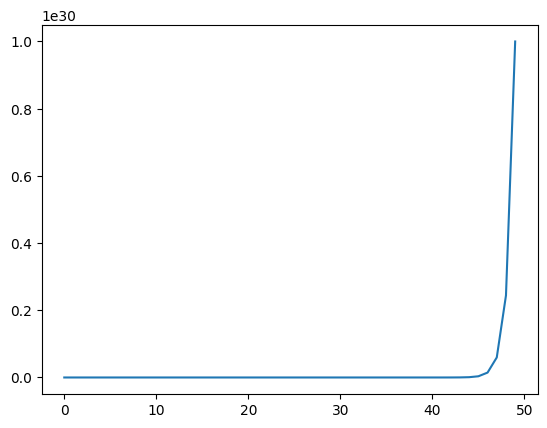

In [46]:
plt.plot(np.logspace(0, 30))

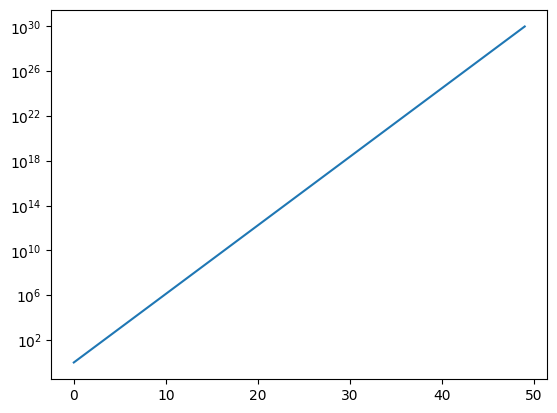

In [47]:
plt.yscale("log")
plt.plot(np.logspace(0, 30))

In [43]:
np.geomspace(1, 30)

array([ 1.        ,  1.07187794,  1.14892231,  1.23150448,  1.32002248,
        1.41490297,  1.51660328,  1.62561359,  1.74245934,  1.86770373,
        2.00195042,  2.14584648,  2.3000855 ,  2.4654109 ,  2.64261955,
        2.8325656 ,  3.03616457,  3.25439781,  3.48831721,  3.73905026,
        4.00780548,  4.29587827,  4.60465714,  4.93563039,  5.29039332,
        5.67065588,  6.07825093,  6.51514306,  6.98343811,  7.48539323,
        8.02342785,  8.6001353 ,  9.21829528,  9.88088733, 10.59110513,
       11.35237191, 12.16835699, 13.04299338, 13.98049684, 14.98538611,
       16.06250475, 17.21704446, 18.45457009, 19.78104652, 21.20286734,
       22.7268857 , 24.36044736, 26.11142606, 27.9882615 , 30.        ])

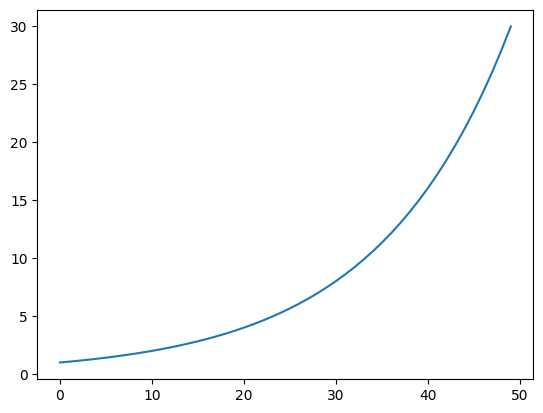

In [44]:
plt.plot(np.geomspace(1, 30))

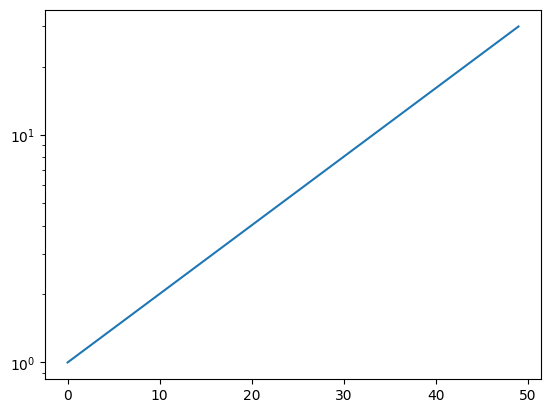

In [48]:
plt.yscale("log")
plt.plot(np.geomspace(1, 30))

## Matrices - **deprecated**


### **Deprecated** - use ndarray instead


In [70]:
a = np.arange(20).reshape((4, 5))
a
a.T
m = np.matrix(a)
m
m.T
m.H
m.I
m.A

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

array([[ 0,  5, 10, 15],
       [ 1,  6, 11, 16],
       [ 2,  7, 12, 17],
       [ 3,  8, 13, 18],
       [ 4,  9, 14, 19]])

matrix([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]])

matrix([[ 0,  5, 10, 15],
        [ 1,  6, 11, 16],
        [ 2,  7, 12, 17],
        [ 3,  8, 13, 18],
        [ 4,  9, 14, 19]])

matrix([[ 0,  5, 10, 15],
        [ 1,  6, 11, 16],
        [ 2,  7, 12, 17],
        [ 3,  8, 13, 18],
        [ 4,  9, 14, 19]])

matrix([[-0.176, -0.092, -0.008,  0.076],
        [-0.094, -0.048, -0.002,  0.044],
        [-0.012, -0.004,  0.004,  0.012],
        [ 0.07 ,  0.04 ,  0.01 , -0.02 ],
        [ 0.152,  0.084,  0.016, -0.052]])

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [73]:
np.asmatrix(a)

matrix([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]])

## memmap


In [76]:
a = np.memmap("newfile.dat", dtype=int, mode="w+", shape=1000)
a[10] = 10.0
a[30] = 30.0
a.flush()
del a
b = np.memmap("newfile.dat", dtype=int)
print(b[10], b[30])

10 30


## Masked Arrays


In [94]:
m = ma.masked_array([1, 2, 3, -1, 5], [0, 0, 0, 1, 0])
m
m.sum()

masked_array(data=[1, 2, 3, --, 5],
             mask=[False, False, False,  True, False],
       fill_value=999999)

11

In [92]:
a = np.array([1.0, -1, np.nan, np.inf])
a
m = ma.fix_invalid(a, fill_value=0)
m
m.mask
np.asarray(m[~m.mask])

array([ 1., -1., nan, inf])

masked_array(data=[1.0, -1.0, --, --],
             mask=[False, False,  True,  True],
       fill_value=1e+20)

array([False, False,  True,  True])

array([ 1., -1.])

In [97]:
m = ma.masked_array([1, 2, 3, -1, 5], [0, 0, 0, 1, 0])
m

m[0] = ma.masked
m
m.mask = True
m
m.mask = ma.nomask
m

masked_array(data=[1, 2, 3, --, 5],
             mask=[False, False, False,  True, False],
       fill_value=999999)

masked_array(data=[--, 2, 3, --, 5],
             mask=[ True, False, False,  True, False],
       fill_value=999999)

masked_array(data=[--, --, --, --, --],
             mask=[ True,  True,  True,  True,  True],
       fill_value=999999,
            dtype=int64)

masked_array(data=[1, 2, 3, -1, 5],
             mask=[False, False, False, False, False],
       fill_value=999999)

In [50]:
m = ma.masked_array([[1, 2, 3, -1, 5]], [[0, 0, 0, 1, 0]])
n = ma.masked_array([[6, -1, 8, 9, -1]], [[0, 1, 0, 0, 1]])
ma.concatenate((m, n))
ma.concatenate((m, n), axis=1)

masked_array(
  data=[[1, 2, 3, --, 5],
        [6, --, 8, 9, --]],
  mask=[[False, False, False,  True, False],
        [False,  True, False, False,  True]],
  fill_value=999999)

masked_array(data=[[1, 2, 3, --, 5, 6, --, 8, 9, --]],
             mask=[[False, False, False,  True, False, False,  True,
                    False, False,  True]],
       fill_value=999999)

In [99]:
m = ma.masked_array([1, 2, 3, -1, 5], [0, 0, 0, 1, 0])
m
m[3]

masked_array(data=[1, 2, 3, --, 5],
             mask=[False, False, False,  True, False],
       fill_value=999999)

masked

In [103]:
m = ma.masked_array([1, 2, 3, -1, 5], dtype=np.float128)
m
# np.log - would cause an error here.
lm = ma.log(m)
lm
np.exp(lm)

masked_array(data=[ 1.,  2.,  3., -1.,  5.],
             mask=False,
       fill_value=1e+20,
            dtype=float128)

masked_array(data=[0.0, 0.69314718055994530943, 1.0986122886681096914, --,
                   1.6094379124341003746],
             mask=[False, False, False,  True, False],
       fill_value=1e+20,
            dtype=float128)

masked_array(data=[1.0, 2.0, 3.0, --, 5.0],
             mask=[False, False, False,  True, False],
       fill_value=1e+20,
            dtype=float128)

In [106]:
x = np.array([0.0, 1.0, -9999, 3.0, 4.0])
m = ma.masked_values(x, -9999)
m
m.filled(m.mean())

masked_array(data=[0.0, 1.0, --, 3.0, 4.0],
             mask=[False, False,  True, False, False],
       fill_value=-9999.0)

array([0., 1., 2., 3., 4.])

In [115]:
x = ma.array([1, -1, 3, 4, 5, 6])
y = ma.array([1, 2, 0, 4, 5, 6])
z = ma.sqrt(x / y)
z

masked_array(data=[1.0, --, --, 1.0, 1.0, 1.0],
             mask=[False,  True,  True, False, False, False],
       fill_value=1e+20)

In [116]:
z.compressed()

array([1., 1., 1., 1.])

In [114]:
d = np.linspace(0, 1, 21, dtype=np.float128)
d
ma.masked_outside(d, 0.2, 0.8)
d.mean() - ma.masked_outside(d, 0.2, 0.8).mean()

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ],
      dtype=float128)

masked_array(data=[--, --, --, --, 0.2000000000000000111, 0.25,
                   0.3000000000000000444, 0.3500000000000000333,
                   0.4000000000000000222, 0.4500000000000000111, 0.5,
                   0.5500000000000000444, 0.6000000000000000888,
                   0.6500000000000000222, 0.7000000000000000666, 0.75,
                   0.8000000000000000444, --, --, --, --],
             mask=[ True,  True,  True,  True, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False,  True,  True,  True,  True],
       fill_value=1e+20,
            dtype=float128)

-1.4636729328554309859e-18

## Reshape / Resize


In [100]:
np.arange(20).reshape((4, 5))

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [52]:
a = np.array([[1, 2, 3], [4, 5, 6]])
a
a.shape
b = a.reshape((3, 2))
b
b.shape

array([[1, 2, 3],
       [4, 5, 6]])

(2, 3)

array([[1, 2],
       [3, 4],
       [5, 6]])

(3, 2)

In [56]:
a = np.arange(1, 16, 2)
a
a.reshape((4, 2))
a.reshape((2, 4))

array([ 1,  3,  5,  7,  9, 11, 13, 15])

array([[ 1,  3],
       [ 5,  7],
       [ 9, 11],
       [13, 15]])

array([[ 1,  3,  5,  7],
       [ 9, 11, 13, 15]])

In [58]:
a = np.array([[1, 2, 3], [4, 5, 6]])
a
a.flatten()  # Copy
a.flatten("K")

array([[1, 2, 3],
       [4, 5, 6]])

array([1, 2, 3, 4, 5, 6])

array([1, 2, 3, 4, 5, 6])

In [39]:
a = np.array([[1, 2, 3], [4, 5, 6]])
a
a.T  # View

array([[1, 2, 3],
       [4, 5, 6]])

array([[1, 4],
       [2, 5],
       [3, 6]])

In [260]:
a = np.array([[1, 2, 3], [4, 5, 6]])
a.resize((4, 4))
a

array([[1, 2, 3, 4],
       [5, 6, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [270]:
a = np.array([[1, 2, 3], [4, 5, 6]])
b = a.view()
# b
a.resize((2, 2), refcheck=False)
a
a.resize((3, 3), refcheck=False)
a
b  # scrambled

array([[1, 2],
       [3, 4]])

array([[1, 2, 3],
       [4, 0, 0],
       [0, 0, 0]])

array([[94589924599825, -971755265015044974,              3],
       [             4,              5,              6]])

In [93]:
a = np.arange(5)
a
np.resize(a, (6, 3))
p = np.pad(a, 6)
p
np.trim_zeros(p)

array([0, 1, 2, 3, 4])

array([[0, 1, 2],
       [3, 4, 0],
       [1, 2, 3],
       [4, 0, 1],
       [2, 3, 4],
       [0, 1, 2]])

array([0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 0, 0, 0, 0, 0, 0])

array([1, 2, 3, 4])

In [97]:
a = np.arange(10).reshape((5, 2))
a
np.resize(a, (6, 3))
p = np.pad(a, 1)
p

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8],
       [9, 0, 1],
       [2, 3, 4],
       [5, 6, 7]])

array([[0, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 2, 3, 0],
       [0, 4, 5, 0],
       [0, 6, 7, 0],
       [0, 8, 9, 0],
       [0, 0, 0, 0]])

In [305]:
a = np.arange(10).reshape((5, 2))
a
np.pad(a, 1)
np.pad(a, 2)
np.pad(a, 1, "edge")
np.pad(a, 3, "linear_ramp")
np.pad(a, 1, "maximum")
np.pad(a, 1, "median")
np.pad(a, 1, "reflect")
np.pad(a, 1, "symmetric")
np.pad(a, 1, "wrap")

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

array([[0, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 2, 3, 0],
       [0, 4, 5, 0],
       [0, 6, 7, 0],
       [0, 8, 9, 0],
       [0, 0, 0, 0]])

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 2, 3, 0, 0],
       [0, 0, 4, 5, 0, 0],
       [0, 0, 6, 7, 0, 0],
       [0, 0, 8, 9, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

array([[0, 0, 1, 1],
       [0, 0, 1, 1],
       [2, 2, 3, 3],
       [4, 4, 5, 5],
       [6, 6, 7, 7],
       [8, 8, 9, 9],
       [8, 8, 9, 9]])

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 2, 3, 2, 1, 0],
       [0, 1, 2, 4, 5, 3, 1, 0],
       [0, 2, 4, 6, 7, 4, 2, 0],
       [0, 2, 5, 8, 9, 6, 3, 0],
       [0, 1, 3, 5, 6, 4, 2, 0],
       [0, 0, 1, 2, 3, 2, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

array([[9, 8, 9, 9],
       [1, 0, 1, 1],
       [3, 2, 3, 3],
       [5, 4, 5, 5],
       [7, 6, 7, 7],
       [9, 8, 9, 9],
       [9, 8, 9, 9]])

array([[4, 4, 5, 4],
       [0, 0, 1, 0],
       [2, 2, 3, 2],
       [4, 4, 5, 4],
       [6, 6, 7, 6],
       [8, 8, 9, 8],
       [4, 4, 5, 4]])

array([[3, 2, 3, 2],
       [1, 0, 1, 0],
       [3, 2, 3, 2],
       [5, 4, 5, 4],
       [7, 6, 7, 6],
       [9, 8, 9, 8],
       [7, 6, 7, 6]])

array([[0, 0, 1, 1],
       [0, 0, 1, 1],
       [2, 2, 3, 3],
       [4, 4, 5, 5],
       [6, 6, 7, 7],
       [8, 8, 9, 9],
       [8, 8, 9, 9]])

array([[9, 8, 9, 8],
       [1, 0, 1, 0],
       [3, 2, 3, 2],
       [5, 4, 5, 4],
       [7, 6, 7, 6],
       [9, 8, 9, 8],
       [1, 0, 1, 0]])

## Transpose


In [271]:
a = np.array([[1, 2], [3, 4]])
a
a.transpose()
a.transpose((1, 0))
a.transpose((0, 1))

array([[1, 2],
       [3, 4]])

array([[1, 3],
       [2, 4]])

array([[1, 3],
       [2, 4]])

array([[1, 2],
       [3, 4]])

In [275]:
a = np.arange(8).reshape(2, 2, 2)
a
a.transpose()
a.transpose((2, 1, 0))
a.transpose((1, 0, 2))
a.transpose((0, 2, 1))

array([[[0, 1],
        [2, 3]],

       [[4, 5],
        [6, 7]]])

array([[[0, 4],
        [2, 6]],

       [[1, 5],
        [3, 7]]])

array([[[0, 4],
        [2, 6]],

       [[1, 5],
        [3, 7]]])

array([[[0, 1],
        [4, 5]],

       [[2, 3],
        [6, 7]]])

array([[[0, 2],
        [1, 3]],

       [[4, 6],
        [5, 7]]])

In [276]:
a = np.arange(8).reshape(2, 2, 2)
a
a.swapaxes(0, 1)

array([[[0, 1],
        [2, 3]],

       [[4, 5],
        [6, 7]]])

array([[[0, 1],
        [4, 5]],

       [[2, 3],
        [6, 7]]])

In [134]:
a = np.arange(24).reshape(2, 3, 4)
a
# Performs a shift
b = np.moveaxis(a, 0, -1)
b.shape
b
# Performs another shift
c = np.moveaxis(b, 0, -1)
c.shape
c
np.moveaxis(c, 0, -1)

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

(3, 4, 2)

array([[[ 0, 12],
        [ 1, 13],
        [ 2, 14],
        [ 3, 15]],

       [[ 4, 16],
        [ 5, 17],
        [ 6, 18],
        [ 7, 19]],

       [[ 8, 20],
        [ 9, 21],
        [10, 22],
        [11, 23]]])

(4, 2, 3)

array([[[ 0,  4,  8],
        [12, 16, 20]],

       [[ 1,  5,  9],
        [13, 17, 21]],

       [[ 2,  6, 10],
        [14, 18, 22]],

       [[ 3,  7, 11],
        [15, 19, 23]]])

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

## Rearrange


In [106]:
a = np.arange(8).reshape((2, 2, 2))
np.flip(a)
np.flip(a, 0)
np.flip(a, 1)
np.flip(a, 2)

array([[[7, 6],
        [5, 4]],

       [[3, 2],
        [1, 0]]])

array([[[4, 5],
        [6, 7]],

       [[0, 1],
        [2, 3]]])

array([[[2, 3],
        [0, 1]],

       [[6, 7],
        [4, 5]]])

array([[[1, 0],
        [3, 2]],

       [[5, 4],
        [7, 6]]])

In [107]:
np.flipud(a)
np.fliplr(a)

array([[[4, 5],
        [6, 7]],

       [[0, 1],
        [2, 3]]])

array([[[2, 3],
        [0, 1]],

       [[6, 7],
        [4, 5]]])

In [113]:
a = np.arange(15)
a
np.roll(a, 2)
b = a.reshape((3, 5))
b
np.roll(b, 2)
np.roll(b, 2, axis=0)
np.roll(b, 2, axis=1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

array([13, 14,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

array([[13, 14,  0,  1,  2],
       [ 3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12]])

array([[ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [ 0,  1,  2,  3,  4]])

array([[ 3,  4,  0,  1,  2],
       [ 8,  9,  5,  6,  7],
       [13, 14, 10, 11, 12]])

In [131]:
m = np.array([[1, 2], [3, 4]], int)
m
np.rot90(m)
np.rot90(m, 2)

array([[1, 2],
       [3, 4]])

array([[2, 4],
       [1, 3]])

array([[4, 3],
       [2, 1]])

## Bits


In [148]:
a = np.array([[[1, 0, 1], [0, 1, 0]], [[1, 1, 0], [0, 0, 1]]])
a
b = np.packbits(a, axis=-1)
b
np.unpackbits(b, axis=-1)

array([[[1, 0, 1],
        [0, 1, 0]],

       [[1, 1, 0],
        [0, 0, 1]]])

array([[[160],
        [ 64]],

       [[192],
        [ 32]]], dtype=uint8)

array([[[1, 0, 1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0]],

       [[1, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0]]], dtype=uint8)

In [147]:
a = np.array([[1, 0, 1, 0, 1, 0, 1, 1, 1, 1], [1, 1, 0, 0, 0, 1, 1, 1, 1, 1]])
a
b = np.packbits(a, axis=-1)
b
np.unpackbits(b)
np.unpackbits(b, axis=1)
np.unpackbits(b, axis=-1)

array([[1, 0, 1, 0, 1, 0, 1, 1, 1, 1],
       [1, 1, 0, 0, 0, 1, 1, 1, 1, 1]])

array([[171, 192],
       [199, 192]], dtype=uint8)

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0], dtype=uint8)

array([[1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]], dtype=uint8)

array([[1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]], dtype=uint8)

## Dimensions


In [136]:
a = np.arange(6).reshape(2, 3)
a
np.atleast_3d(a)

array([[0, 1, 2],
       [3, 4, 5]])

array([[[0],
        [1],
        [2]],

       [[3],
        [4],
        [5]]])

In [141]:
a = np.arange(2).reshape(2, 1)
a
b = np.arange(3)
b
c = np.broadcast(a, b)
c.shape

array([[0],
       [1]])

array([0, 1, 2])

(2, 3)

In [143]:
a = np.arange(2).reshape(2, 1)
a
b = np.arange(3)
b
np.broadcast_to(a, (2, 3))
np.broadcast_to(b, (2, 3))

array([[0],
       [1]])

array([0, 1, 2])

array([[0, 0, 0],
       [1, 1, 1]])

array([[0, 1, 2],
       [0, 1, 2]])

In [146]:
a = np.arange(2).reshape(2, 1)
a
np.expand_dims(a, axis=0)
np.expand_dims(a, axis=1)

array([[0],
       [1]])

array([[[0],
        [1]]])

array([[[0]],

       [[1]]])

In [147]:
b = np.arange(3)
b
np.expand_dims(b, axis=0)
np.expand_dims(b, axis=1)

array([0, 1, 2])

array([[0, 1, 2]])

array([[0],
       [1],
       [2]])

In [151]:
b = np.arange(3)
b
c = np.expand_dims(b, axis=0)
c
np.squeeze(c)
np.squeeze(c, axis=0)
d = np.expand_dims(b, axis=1)
d
np.squeeze(d)
np.squeeze(d, axis=1)

array([0, 1, 2])

array([[0, 1, 2]])

array([0, 1, 2])

array([0, 1, 2])

array([[0],
       [1],
       [2]])

array([0, 1, 2])

array([0, 1, 2])

## Type Conversion


In [192]:
a = np.array([1, 2, 3, 4])
np.asarray(a, dtype="U")

array(['1', '2', '3', '4'], dtype='<U21')

In [9]:
np.asarray([1, 2, 3, 4])
np.asarray({1, 2, 3, 4})
np.asarray(iter({1, 2, 3, 4}))

array([1, 2, 3, 4])

array({1, 2, 3, 4}, dtype=object)

array(<set_iterator object at 0x7f0c40a18800>, dtype=object)

In [13]:
np.asanyarray([1, 2, 3, 4])
a = np.array([(1.0, 2), (3.0, 4)], dtype="f4,i4")
np.asarray(a)
np.asanyarray(a)

a = np.array([(1.0, 2), (3.0, 4)], dtype="f4,i4").view(np.recarray)
np.asarray(a)
np.asanyarray(a)

array([1, 2, 3, 4])

array([(1., 2), (3., 4)], dtype=[('f0', '<f4'), ('f1', '<i4')])

array([(1., 2), (3., 4)], dtype=[('f0', '<f4'), ('f1', '<i4')])

array([(1., 2), (3., 4)],
      dtype=(numpy.record, [('f0', '<f4'), ('f1', '<i4')]))

rec.array([(1., 2), (3., 4)],
          dtype=[('f0', '<f4'), ('f1', '<i4')])

In [15]:
np.fromiter({1, 2, 3, 4}, dtype=int)

array([1, 2, 3, 4])

In [19]:
np.fromfunction(lambda i, j: i * j, (3, 3))
np.fromfunction(lambda i, j: i == j, (3, 3))

array([[0., 0., 0.],
       [0., 1., 2.],
       [0., 2., 4.]])

array([[ True, False, False],
       [False,  True, False],
       [False, False,  True]])

In [22]:
a = [1, 2, np.inf]

try:
    np.asarray_chkfinite(a)
except ValueError:
    print("ValueError")

ValueError


In [23]:
x = np.arange(6).reshape(2, 3)
x
x.flags

y = np.require(x, dtype=np.float32, requirements=["A", "O", "W", "F"])
y
y.flags

array([[0, 1, 2],
       [3, 4, 5]])

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False

array([[0., 1., 2.],
       [3., 4., 5.]], dtype=float32)

  C_CONTIGUOUS : False
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False

## Concatenate


In [6]:
a = np.array([[1, 2], [2, 1]])
b = np.array([[2, 2], [3, 2], [4, 3]])

np.vstack((b, a))

array([[2, 2],
       [3, 2],
       [4, 3],
       [1, 2],
       [2, 1]])

In [11]:
a = np.array([[1, 2], [2, 1]])
a
b = np.array([[2, 2], [3, 2], [4, 3]]).reshape(2, 3)
b
np.hstack((a, b))

array([[1, 2],
       [2, 1]])

array([[2, 2, 3],
       [2, 4, 3]])

array([[1, 2, 2, 2, 3],
       [2, 1, 2, 4, 3]])

In [34]:
arrays = [np.arange(6).reshape((2, 3)) for _ in range(5)]
arrays[0].shape
arrays
stack = np.stack(arrays)
stack.shape
stack

stack = np.stack(arrays, axis=1)
stack.shape
stack

stack = np.stack(arrays, axis=2)
stack.shape
stack

(2, 3)

[array([[0, 1, 2],
        [3, 4, 5]]),
 array([[0, 1, 2],
        [3, 4, 5]]),
 array([[0, 1, 2],
        [3, 4, 5]]),
 array([[0, 1, 2],
        [3, 4, 5]]),
 array([[0, 1, 2],
        [3, 4, 5]])]

(5, 2, 3)

array([[[0, 1, 2],
        [3, 4, 5]],

       [[0, 1, 2],
        [3, 4, 5]],

       [[0, 1, 2],
        [3, 4, 5]],

       [[0, 1, 2],
        [3, 4, 5]],

       [[0, 1, 2],
        [3, 4, 5]]])

(2, 5, 3)

array([[[0, 1, 2],
        [0, 1, 2],
        [0, 1, 2],
        [0, 1, 2],
        [0, 1, 2]],

       [[3, 4, 5],
        [3, 4, 5],
        [3, 4, 5],
        [3, 4, 5],
        [3, 4, 5]]])

(2, 3, 5)

array([[[0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2]],

       [[3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4],
        [5, 5, 5, 5, 5]]])

In [35]:
A = np.eye(2) * 2
A
B = np.eye(3) * 3
B
np.block([[A, np.zeros((2, 3))], [np.ones((3, 2)), B]])

array([[2., 0.],
       [0., 2.]])

array([[3., 0., 0.],
       [0., 3., 0.],
       [0., 0., 3.]])

array([[2., 0., 0., 0., 0.],
       [0., 2., 0., 0., 0.],
       [1., 1., 3., 0., 0.],
       [1., 1., 0., 3., 0.],
       [1., 1., 0., 0., 3.]])

In [36]:
a = np.array(0)
a
np.block([a])
np.block([[a]])
b = np.array([1])
b
np.block([b])
np.block([[b]])

array(0)

array([0])

array([[0]])

array([1])

array([1])

array([[1]])

In [38]:
a = np.array([[1], [2], [3]])
a
b = np.array([[4], [5], [6]])
np.vstack((a, b))
np.hstack((a, b))

array([[1],
       [2],
       [3]])

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

array([[1, 4],
       [2, 5],
       [3, 6]])

In [43]:
# `dstack` - concatenate the third dimension
# useful to join channels of 2D images.
a = np.array([[1], [2], [3]])
a.shape
b = np.array([[4], [5], [6]])
c = np.dstack((a, b))
c.shape
c

(3, 1)

(3, 1, 2)

array([[[1, 4]],

       [[2, 5]],

       [[3, 6]]])

In [45]:
a = np.array([1, 2, 3])
a.shape
b = np.array([4, 5, 6])
c = np.dstack((a, b))
c.shape
c

(3,)

(1, 3, 2)

array([[[1, 4],
        [2, 5],
        [3, 6]]])

## Split


In [51]:
x = np.arange(8.0)
x
np.split(x, [3, 5, 6, 10])

array([0., 1., 2., 3., 4., 5., 6., 7.])

[array([0., 1., 2.]),
 array([3., 4.]),
 array([5.]),
 array([6., 7.]),
 array([], dtype=float64)]

In [52]:
x = np.arange(8.0)
x
np.array_split(x, 3)

array([0., 1., 2., 3., 4., 5., 6., 7.])

[array([0., 1., 2.]), array([3., 4., 5.]), array([6., 7.])]

In [54]:
x = np.arange(8.0)
x
np.split(x, 4)  # length of x needs to be multiple of 4

array([0., 1., 2., 3., 4., 5., 6., 7.])

[array([0., 1.]), array([2., 3.]), array([4., 5.]), array([6., 7.])]

In [56]:
a = np.array([[1], [2], [3]])
a.shape
b = np.array([[4], [5], [6]])
c = np.dstack((a, b))
c.shape
c
np.dsplit(c, 2)

(3, 1)

(3, 1, 2)

array([[[1, 4]],

       [[2, 5]],

       [[3, 6]]])

[array([[[1]],
 
        [[2]],
 
        [[3]]]),
 array([[[4]],
 
        [[5]],
 
        [[6]]])]

In [58]:
x = np.arange(16.0).reshape(4, 4)
x
np.hsplit(x, 2)
np.vsplit(x, 2)

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.],
       [12., 13., 14., 15.]])

[array([[ 0.,  1.],
        [ 4.,  5.],
        [ 8.,  9.],
        [12., 13.]]),
 array([[ 2.,  3.],
        [ 6.,  7.],
        [10., 11.],
        [14., 15.]])]

[array([[0., 1., 2., 3.],
        [4., 5., 6., 7.]]),
 array([[ 8.,  9., 10., 11.],
        [12., 13., 14., 15.]])]

## Tile / Repeat


In [60]:
a = np.array([0, 1, 2])
np.tile(a, 2)
np.tile(a, (2, 2))

array([0, 1, 2, 0, 1, 2])

array([[0, 1, 2, 0, 1, 2],
       [0, 1, 2, 0, 1, 2]])

In [68]:
a = np.array([[[0], [1], [2]], [[3], [4], [5]]])
a.shape
a
np.tile(a, 2).shape
np.tile(a, 2)
np.tile(a, (2, 2)).shape
np.tile(a, (2, 2))
np.tile(a, (2, 2, 2)).shape
np.tile(a, (2, 2, 2, 2)).shape

(2, 3, 1)

array([[[0],
        [1],
        [2]],

       [[3],
        [4],
        [5]]])

(2, 3, 2)

array([[[0, 0],
        [1, 1],
        [2, 2]],

       [[3, 3],
        [4, 4],
        [5, 5]]])

(2, 6, 2)

array([[[0, 0],
        [1, 1],
        [2, 2],
        [0, 0],
        [1, 1],
        [2, 2]],

       [[3, 3],
        [4, 4],
        [5, 5],
        [3, 3],
        [4, 4],
        [5, 5]]])

(4, 6, 2)

(2, 4, 6, 2)

In [ ]:
x = np.array([[0, 1], [2, 3], [4, 5]])
x
x.repeat(2)
x.repeat(2, axis=0)
x.repeat(2, axis=1)

array([[0, 1],
       [2, 3],
       [4, 5]])

array([0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5])

array([[0, 1],
       [0, 1],
       [2, 3],
       [2, 3],
       [4, 5],
       [4, 5]])

array([[0, 0, 1, 1],
       [2, 2, 3, 3],
       [4, 4, 5, 5]])

## Copies and Views


In [211]:
a = np.array([1, 2, 3, 4, 9, 0, 2, 3, 1, 2, 3, 19])
a
b = a[2:9]
b
id(b.base) == id(a)
b += 10
a

array([ 1,  2,  3,  4,  9,  0,  2,  3,  1,  2,  3, 19])

array([3, 4, 9, 0, 2, 3, 1])

True

array([ 1,  2, 13, 14, 19, 10, 12, 13, 11,  2,  3, 19])

In [223]:
a = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
a
c = np.ravel(a)
c
id(c.base) == id(a)
c = a.reshape(-1)
c
id(c.base) == id(a)

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

array([1, 2, 3, 4, 5, 6, 7, 8])

True

array([1, 2, 3, 4, 5, 6, 7, 8])

True

## Slicing


In [103]:
a = np.arange(20).reshape((4, 5))
a
a[0]
a[0][3]  # less efficient
a[0, 3]  # more efficient

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

array([0, 1, 2, 3, 4])

3

3

In [104]:
a[1::2, ::3]

array([[ 5,  8],
       [15, 18]])

In [105]:
a[::2, 1::3]

array([[ 1,  4],
       [11, 14]])

In [113]:
a = np.arange(30).reshape((3, 2, 5))
a
a[...]
a[..., 0]

array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9]],

       [[10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]],

       [[20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29]]])

array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9]],

       [[10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]],

       [[20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29]]])

array([[ 0,  5],
       [10, 15],
       [20, 25]])

In [120]:
a = np.arange(6).reshape((2, 3))
a
a[..., None]

array([[0, 1, 2],
       [3, 4, 5]])

array([[[0],
        [1],
        [2]],

       [[3],
        [4],
        [5]]])

In [123]:
a = np.arange(4)
a
a[..., None]
a[None, ...]
a[..., None] + a[None, ...]

array([0, 1, 2, 3])

array([[0],
       [1],
       [2],
       [3]])

array([[0, 1, 2, 3]])

array([[0, 1, 2, 3],
       [1, 2, 3, 4],
       [2, 3, 4, 5],
       [3, 4, 5, 6]])

In [115]:
a = np.arange(30).reshape((3, 2, 5))
a
a[:, None, :]

array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9]],

       [[10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]],

       [[20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29]]])

array([[[[ 0,  1,  2,  3,  4],
         [ 5,  6,  7,  8,  9]]],


       [[[10, 11, 12, 13, 14],
         [15, 16, 17, 18, 19]]],


       [[[20, 21, 22, 23, 24],
         [25, 26, 27, 28, 29]]]])

In [177]:
z = np.arange(81).reshape(3, 3, 3, 3)
z[1]
# Select first and last dimension.
i = (1, ..., 1)
z[i]

array([[[27, 28, 29],
        [30, 31, 32],
        [33, 34, 35]],

       [[36, 37, 38],
        [39, 40, 41],
        [42, 43, 44]],

       [[45, 46, 47],
        [48, 49, 50],
        [51, 52, 53]]])

array([[[27, 28, 29],
        [30, 31, 32],
        [33, 34, 35]],

       [[36, 37, 38],
        [39, 40, 41],
        [42, 43, 44]],

       [[45, 46, 47],
        [48, 49, 50],
        [51, 52, 53]]])

array([[28, 31, 34],
       [37, 40, 43],
       [46, 49, 52]])

## Indexing


In [126]:
a = np.arange(30).reshape((5, 3, 2))
a
a[3, 2, 1]
a[(3, 2, 1)]
a[(3, 2, 1),]

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]],

       [[12, 13],
        [14, 15],
        [16, 17]],

       [[18, 19],
        [20, 21],
        [22, 23]],

       [[24, 25],
        [26, 27],
        [28, 29]]])

23

23

array([[[18, 19],
        [20, 21],
        [22, 23]],

       [[12, 13],
        [14, 15],
        [16, 17]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]]])

In [ ]:
a = np.array([6, 2, 0, 7, 5, 8, 0, 9, 1])
i = np.nonzero(a)
i
a[i]

(array([0, 1, 3, 4, 5, 7, 8]),)

array([6, 2, 7, 5, 8, 9, 1])

In [133]:
x = np.arange(35).reshape(5, 7)
b = x > 20
b[:, 1]
x[b]
x[b[:, 5]]

array([False, False, False,  True,  True])

array([21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34])

array([[21, 22, 23, 24, 25, 26, 27],
       [28, 29, 30, 31, 32, 33, 34]])

In [154]:
a = np.arange(35).reshape((5, 7))
a
a[(0, 2, 4), 1:3]
a[:, 1:3][(0, 2, 4),]
a[(0, 2, 4),][:, 1:3]
a[1:2, 1:3]
a[1:2, (1, 2)]

array([[ 0,  1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12, 13],
       [14, 15, 16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25, 26, 27],
       [28, 29, 30, 31, 32, 33, 34]])

array([[ 1,  2],
       [15, 16],
       [29, 30]])

array([[ 1,  2],
       [15, 16],
       [29, 30]])

array([[ 1,  2],
       [15, 16],
       [29, 30]])

array([[8, 9]])

array([[8, 9]])

In [4]:
np.indices((3, 7))

array([[[0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2, 2, 2]],

       [[0, 1, 2, 3, 4, 5, 6],
        [0, 1, 2, 3, 4, 5, 6],
        [0, 1, 2, 3, 4, 5, 6]]])

In [9]:
a
ix = np.ix_([0, 1], [2, 5])
ix
a[ix]

array([[ 0,  1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12, 13],
       [14, 15, 16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25, 26, 27],
       [28, 29, 30, 31, 32, 33, 34]])

(array([[0],
        [1]]),
 array([[2, 5]]))

array([[ 2,  5],
       [ 9, 12]])

In [12]:
o = np.ogrid[0:2, 0:2]
o

[array([[0],
        [1]]),
 array([[0, 1]])]

In [24]:
np.diag_indices(4)
q = np.arange(9).reshape((3, 3))
q
np.diag_indices_from(q)
np.triu(q)
np.mask_indices(3, np.triu)

(array([0, 1, 2, 3]), array([0, 1, 2, 3]))

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

(array([0, 1, 2]), array([0, 1, 2]))

array([[0, 1, 2],
       [0, 4, 5],
       [0, 0, 8]])

(array([0, 0, 0, 1, 1, 2]), array([0, 1, 2, 1, 2, 2]))

In [27]:
o = np.ones((3, 3))
o
np.triu(o)

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

array([[1., 1., 1.],
       [0., 1., 1.],
       [0., 0., 1.]])

In [33]:
a = np.arange(35).reshape((7, 5))
a
a.take([0, 2, 4])
a.take([0, 2, 4], axis=0)
a.take([0, 2, 4], axis=1)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34]])

array([0, 2, 4])

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

array([[ 0,  2,  4],
       [ 5,  7,  9],
       [10, 12, 14],
       [15, 17, 19],
       [20, 22, 24],
       [25, 27, 29],
       [30, 32, 34]])

## Insert / Delete


In [36]:
a = np.arange(35).reshape((7, 5))
a
np.place(a, (a > 5) & (a % 2 == 0), [77, 99])
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34]])

array([[ 0,  1,  2,  3,  4],
       [ 5, 77,  7, 99,  9],
       [77, 11, 99, 13, 77],
       [15, 99, 17, 77, 19],
       [99, 21, 77, 23, 99],
       [25, 77, 27, 99, 29],
       [77, 31, 99, 33, 77]])

In [37]:
a = np.arange(16).reshape((4, 4))
a
np.put(a, [0, 2], [-44, -55])
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

array([[-44,   1, -55,   3],
       [  4,   5,   6,   7],
       [  8,   9,  10,  11],
       [ 12,  13,  14,  15]])

In [40]:
a = np.arange(16).reshape((4, 4))
a
np.putmask(a, a % 3 == 1, a**2)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

array([[  0,   1,   2,   3],
       [ 16,   5,   6,  49],
       [  8,   9, 100,  11],
       [ 12, 169,  14,  15]])

In [41]:
a = np.arange(16).reshape((4, 4))
a
np.fill_diagonal(a, -1)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

array([[-1,  1,  2,  3],
       [ 4, -1,  6,  7],
       [ 8,  9, -1, 11],
       [12, 13, 14, -1]])

In [77]:
a = np.arange(16).reshape((4, 4))
a
np.insert(a, 1, -5, axis=0)
np.insert(a, 1, -5, axis=1)
np.insert(a, 1, -5)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

array([[ 0,  1,  2,  3],
       [-5, -5, -5, -5],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

array([[ 0, -5,  1,  2,  3],
       [ 4, -5,  5,  6,  7],
       [ 8, -5,  9, 10, 11],
       [12, -5, 13, 14, 15]])

array([ 0, -5,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [69]:
a = np.arange(12) + 1
a
mask = np.ones(len(a), dtype=bool)
mask[[0, 2, 4]] = False
a[mask, ...]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

array([ 2,  4,  6,  7,  8,  9, 10, 11, 12])

In [73]:
a = (np.arange(12) + 1).reshape((3, 4))
a
np.delete(a, 1, axis=0)
np.delete(a, 1)

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

array([[ 1,  2,  3,  4],
       [ 9, 10, 11, 12]])

array([ 1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [83]:
np.append([1, 2, 3], [[4, 5, 6], [7, 8, 9]])
np.append([[1, 2, 3]], [[4, 5, 6], [7, 8, 9]], axis=0)
np.append([[1, 2, 3], [11, 22, 33]], [[4, 5, 6], [7, 8, 9]], axis=1)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

array([[ 1,  2,  3,  4,  5,  6],
       [11, 22, 33,  7,  8,  9]])

In [84]:
a = np.array([1, 2, 3])
np.append(a, [4, 5, 6], axis=0)
a

array([1, 2, 3, 4, 5, 6])

array([1, 2, 3])

In [104]:
rng = np.random.default_rng()
a = rng.integers(0, 10, size=10)
a
np.unique(a)
np.unique(a, return_index=1)
np.unique(a, return_counts=1)

array([6, 8, 4, 1, 4, 1, 6, 2, 6, 3])

array([1, 2, 3, 4, 6, 8])

(array([1, 2, 3, 4, 6, 8]), array([3, 7, 9, 2, 0, 1]))

(array([1, 2, 3, 4, 6, 8]), array([2, 1, 1, 2, 3, 1]))

## Assignment


In [ ]:
x = np.arange(10)
x[2:7] = 3
x

array([0, 1, 3, 3, 3, 3, 3, 7, 8, 9])

In [ ]:
x = np.arange(0, 100, 10)
x
x[(1, 1, 3, 1),]
x[(1, 1, 3, 1),] += 1
x
x[(1, 1, 3, 1),] = [11, 12, 31, 13]
x

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

array([10, 10, 30, 10])

array([ 0, 11, 20, 31, 40, 50, 60, 70, 80, 90])

array([ 0, 13, 20, 31, 40, 50, 60, 70, 80, 90])

## Iteration


In [42]:
a = np.arange(12).reshape((4, 3))
a
for x in np.nditer(a):
    print(x, end=" ")

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

0 1 2 3 4 5 6 7 8 9 10 11 

In [49]:
a.T

for x in np.nditer(a.T):
    print(x, end=" ")
print()
for x in np.nditer(a.T.copy()):
    print(x, end=" ")
print()
for x in np.nditer(a.T.copy(order="C")):
    print(x, end=" ")
print()
for x in np.nditer(a.T.copy(order="F")):
    print(x, end=" ")

array([[ 0,  3,  6,  9],
       [ 1,  4,  7, 10],
       [ 2,  5,  8, 11]])

0 1 2 3 4 5 6 7 8 9 10 11 
0 3 6 9 1 4 7 10 2 5 8 11 
0 3 6 9 1 4 7 10 2 5 8 11 
0 1 2 3 4 5 6 7 8 9 10 11 

In [ ]:
b = np.array([[2, 1], [3, 2], [4, 3]])
b
for e in np.nditer(b):
    print(e, end=" ")
print()
b.T
for e in np.nditer(b.T):
    print(e, end=" ")
print()

array([[2, 1],
       [3, 2],
       [4, 3]])

2 1 3 2 4 3 


array([[2, 3, 4],
       [1, 2, 3]])

2 1 3 2 4 3 


In [53]:
a = np.arange(12).reshape((4, 3))
a
with np.nditer(a, op_flags=["readwrite"]) as it:
    for x in it:
        x[...] = 2 * x
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

array([[ 0,  2,  4],
       [ 6,  8, 10],
       [12, 14, 16],
       [18, 20, 22]])

In [52]:
b = np.array([[2, 1], [3, 2], [4, 3]])
b
for e in np.nditer(b, op_flags=["readwrite"]):
    e[...] *= 3
b

array([[2, 1],
       [3, 2],
       [4, 3]])

array([[ 6,  3],
       [ 9,  6],
       [12,  9]])

In [ ]:
b = np.array([[2, 1], [3, 2], [4, 3]])
for e in b.flat:
    print(e, end=" ")
print()

2 1 3 2 4 3 


In [55]:
a = np.arange(6).reshape(2, 3)
a
for x in np.nditer(a, flags=["external_loop"]):
    print(x, end=" ")

array([[0, 1, 2],
       [3, 4, 5]])

[0 1 2 3 4 5] 

In [56]:
for x in np.nditer(a, flags=["external_loop", "buffered"]):
    print(x, end=" ")

[0 1 2 3 4 5] 

In [58]:
a = np.arange(6).reshape(2, 3) - 3
for x in np.nditer(a, op_dtypes=["complex128"], flags=["buffered"]):
    print(np.sqrt(x), end=" ")

1.7320508075688772j 1.4142135623730951j 1j 0j (1+0j) (1.4142135623730951+0j) 

In [59]:
a = np.arange(3)
a
b = np.arange(6).reshape(2, 3)
b
for x, y in np.nditer([a, b]):
    print("%d:%d" % (x, y), end=" ")

array([0, 1, 2])

array([[0, 1, 2],
       [3, 4, 5]])

0:0 1:1 2:2 0:3 1:4 2:5 

In [60]:
a = np.arange(6).reshape(2, 3) - 3
for index, x in np.ndenumerate(a):
    print(index, x)

(0, 0) -3
(0, 1) -2
(0, 2) -1
(1, 0) 0
(1, 1) 1
(1, 2) 2


In [61]:
for index in np.ndindex(3, 2, 1):
    print(index)

(0, 0, 0)
(0, 1, 0)
(1, 0, 0)
(1, 1, 0)
(2, 0, 0)
(2, 1, 0)


In [62]:
a = np.arange(12).reshape(2, 3, 2)
a
i, j = np.nested_iters(a, [[1], [0, 2]], flags=["multi_index"])
i, j
for _ in i:
    print(i.multi_index)
    for y in j:
        print("", j.multi_index, y)

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]]])

(<numpy.nditer at 0x7f49b1d83a50>, <numpy.nditer at 0x7f49b1d839b0>)

(0,)
 (0, 0) 0
 (0, 1) 1
 (1, 0) 6
 (1, 1) 7
(1,)
 (0, 0) 2
 (0, 1) 3
 (1, 0) 8
 (1, 1) 9
(2,)
 (0, 0) 4
 (0, 1) 5
 (1, 0) 10
 (1, 1) 11


In [66]:
a = np.arange(12).reshape(2, 3, 2)
for item in a.T.flat:
    print(item, end=" ")

0 6 2 8 4 10 1 7 3 9 5 11 

## Selection


In [ ]:
i = np.where(a > 5)
i
a[i]

(array([0, 3, 5, 7]),)

array([6, 7, 8, 9])

In [141]:
x = np.array([[0, 1], [1, 1], [2, 2]])
x.sum(0)
x.sum(1)
x.sum(-1)
x[x.sum(-1) <= 2]

array([3, 4])

array([1, 2, 4])

array([1, 2, 4])

array([[0, 1],
       [1, 1]])

In [147]:
a = np.arange(30).reshape(2, 3, 5)
a
b = np.array([[True, False, False], [False, False, True]])
a[b]
b = np.array([[True, False, False], [False, True, True]])
a[b]

array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14]],

       [[15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29]]])

array([[ 0,  1,  2,  3,  4],
       [25, 26, 27, 28, 29]])

array([[ 0,  1,  2,  3,  4],
       [20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29]])

In [279]:
a = np.arange(35).reshape((5, 7))
a
a.take([1, 2, 3], axis=1)

a.take([1, 2, 3], axis=0)

a.take([1, 2, 3])

array([[ 0,  1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12, 13],
       [14, 15, 16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25, 26, 27],
       [28, 29, 30, 31, 32, 33, 34]])

array([[ 1,  2,  3],
       [ 8,  9, 10],
       [15, 16, 17],
       [22, 23, 24],
       [29, 30, 31]])

array([[ 7,  8,  9, 10, 11, 12, 13],
       [14, 15, 16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25, 26, 27]])

array([1, 2, 3])

In [281]:
a = np.arange(35).reshape((5, 7))
a
a.put([0, 2, 10], [-10, -20, -30])
a

array([[ 0,  1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12, 13],
       [14, 15, 16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25, 26, 27],
       [28, 29, 30, 31, 32, 33, 34]])

array([[-10,   1, -20,   3,   4,   5,   6],
       [  7,   8,   9, -30,  11,  12,  13],
       [ 14,  15,  16,  17,  18,  19,  20],
       [ 21,  22,  23,  24,  25,  26,  27],
       [ 28,  29,  30,  31,  32,  33,  34]])

In [292]:
choices = np.arange(35).reshape((7, 5))
choices
a = np.array((2, 1, 0, 3, 4))
a.choose(choices)
np.array((6, 5, 4, 3, 2)).choose(choices)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34]])

array([10,  6,  2, 18, 24])

array([30, 26, 22, 18, 14])

In [6]:
a = np.arange(35).reshape((5, 7))
a
a.compress([True, False, True, True])
a.compress([True, False, True, True], axis=0)
a.compress([True, False, True, True], axis=1)
a[[True, False, True, True, False]]
a[[True, False, True, True, False], ...]
a[..., [True, False, True, True, False, False, False]]

array([[ 0,  1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12, 13],
       [14, 15, 16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25, 26, 27],
       [28, 29, 30, 31, 32, 33, 34]])

array([0, 2, 3])

array([[ 0,  1,  2,  3,  4,  5,  6],
       [14, 15, 16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25, 26, 27]])

array([[ 0,  2,  3],
       [ 7,  9, 10],
       [14, 16, 17],
       [21, 23, 24],
       [28, 30, 31]])

array([[ 0,  1,  2,  3,  4,  5,  6],
       [14, 15, 16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25, 26, 27]])

array([[ 0,  1,  2,  3,  4,  5,  6],
       [14, 15, 16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25, 26, 27]])

array([[ 0,  2,  3],
       [ 7,  9, 10],
       [14, 16, 17],
       [21, 23, 24],
       [28, 30, 31]])

In [10]:
a = np.arange(35).reshape((5, 7))
a
a.diagonal()
a.diagonal(1)
a.diagonal(2)
a.diagonal(3)
a.diagonal(-1)

array([[ 0,  1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12, 13],
       [14, 15, 16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25, 26, 27],
       [28, 29, 30, 31, 32, 33, 34]])

array([ 0,  8, 16, 24, 32])

array([ 1,  9, 17, 25, 33])

array([ 2, 10, 18, 26, 34])

array([ 3, 11, 19, 27])

array([ 7, 15, 23, 31])

In [15]:
a = np.arange(6)
cond = [a < 3, a > 3]
choices = [a + 2, a**2]
np.select(cond, choices, -42)

array([  2,   3,   4, -42,  16,  25])

In [23]:
a = np.arange(12).reshape(3, 4)
a
cond = np.mod(a, 3) == 1
cond
a[cond]
np.extract(cond, a)
mod = np.mod(a, 3)
mod
np.extract(mod, a)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

array([[False,  True, False, False],
       [ True, False, False,  True],
       [False, False,  True, False]])

array([ 1,  4,  7, 10])

array([ 1,  4,  7, 10])

array([[0, 1, 2, 0],
       [1, 2, 0, 1],
       [2, 0, 1, 2]])

array([ 1,  2,  4,  5,  7,  8, 10, 11])

## Field Access


In [158]:
np.zeros((2, 2))
x = np.zeros((2, 2), dtype=[("a", np.int32), ("b", np.float64, (3, 3))])
x
x["a"]
x["b"]

array([[0., 0.],
       [0., 0.]])

array([[(0, [[0., 0., 0.], [0., 0., 0.], [0., 0., 0.]]),
        (0, [[0., 0., 0.], [0., 0., 0.], [0., 0., 0.]])],
       [(0, [[0., 0., 0.], [0., 0., 0.], [0., 0., 0.]]),
        (0, [[0., 0., 0.], [0., 0., 0.], [0., 0., 0.]])]],
      dtype=[('a', '<i4'), ('b', '<f8', (3, 3))])

array([[0, 0],
       [0, 0]], dtype=int32)

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]])

## Operations


### Unary


In [62]:
a.min(axis=0)

array([1, 2, 3])

### Binary


In [68]:
a = np.array([[1], [2]])
b = np.array([[2, 1], [3, 2], [4, 3]])

b @ a

array([[ 4],
       [ 7],
       [10]])

In [71]:
a += a
a

array([[4],
       [8]])

In [119]:
a = np.array([1, 2, 4, 5])
b = np.array([2, 1, 3, 2, 4, 3])
np.intersect1d(a, b)

array([1, 2, 4])

In [120]:
a = np.array([1.0, 2.000000000000001, 4.0, 5.0])
b = np.array([1, 2, 4, 5])
np.allclose(a, b)

True

### Broadcasting


In [33]:
b = np.array([[2, 1], [3, 2], [4, 3]])
b + 1
1 + b

array([[3, 2],
       [4, 3],
       [5, 4]])

array([[3, 2],
       [4, 3],
       [5, 4]])

In [35]:
a = np.array([1])
b = np.array([[2, 1], [3, 2], [4, 3]])

b + a
a + b

array([[3, 2],
       [4, 3],
       [5, 4]])

array([[3, 2],
       [4, 3],
       [5, 4]])

In [32]:
a = np.array([1, 2, 3])
b = np.array([[2, 1], [3, 2], [4, 3]]).reshape((2, 3))
b + a
a + b

array([[3, 3, 6],
       [3, 6, 6]])

array([[3, 3, 6],
       [3, 6, 6]])

In [34]:
a = np.array([1, 2])
b = np.array([[2, 1], [3, 2], [4, 3]])

b + a
a + b

array([[3, 3],
       [4, 4],
       [5, 5]])

array([[3, 3],
       [4, 4],
       [5, 5]])

## Statistical


In [44]:
b = np.array([[20, 1, 5], [3, 20, 7], [44, 3, 99]])
b

array([[20,  1,  5],
       [ 3, 20,  7],
       [44,  3, 99]])

In [47]:
b.ptp()
b.ptp(0)
b.ptp(1)

98

array([41, 19, 94])

array([19, 17, 96])

In [51]:
np.percentile(b, 10, 0)
np.percentile(b, 99, 0)

array([6.4, 1.4, 5.4])

array([43.52, 19.66, 97.16])

## Calculation


In [9]:
a = np.array([[2, 1], [3, 2], [4, 3]])
a.max()
a.max(axis=0)
a.argmax(axis=0)
a.max(axis=1)
a.argmax(axis=1)
b = np.array([1, 2, 9, 6, 7, 8, 3, 4, 5])
b.argmax()

4

array([4, 3])

array([2, 2])

array([2, 3, 4])

array([0, 0, 0])

2

In [14]:
a.clip(2)
a.clip(1, 3)
b.clip(1, 5)

array([[2, 2],
       [3, 2],
       [4, 3]])

array([[2, 1],
       [3, 2],
       [3, 3]])

array([1, 2, 5, 5, 5, 5, 3, 4, 5])

In [17]:
a.round(-1)
c = np.array([20.3, 88.4, 77.5, 123.4])
c.round()
c.round(1)

array([[0, 0],
       [0, 0],
       [0, 0]])

array([ 20.,  88.,  78., 123.])

array([ 20.3,  88.4,  77.5, 123.4])

In [19]:
# Sum across the diagonals.
b = np.array([[20, 1, 5], [3, 20, 7], [44, 3, 99]])
b.trace()

139

In [20]:
b.sum()
b.sum(axis=0)

202

array([ 67,  24, 111])

In [27]:
b = np.array([1, 2, 9, 6, 7, 8, 3, 4, 5])
c = b.clip(2, 7)
b < c
c < b
c
-c
~c

array([ True, False, False, False, False, False, False, False, False])

array([False, False,  True, False, False,  True, False, False, False])

array([2, 2, 7, 6, 7, 7, 3, 4, 5])

array([-2, -2, -7, -6, -7, -7, -3, -4, -5])

array([-3, -3, -8, -7, -8, -8, -4, -5, -6])

In [29]:
divmod(b, 3)

(array([0, 0, 3, 2, 2, 2, 1, 1, 1]), array([1, 2, 0, 0, 1, 2, 0, 1, 2]))

In [33]:
b @ b

285

## Universal Functions


In [122]:
np.multiply.outer([1, 2, 3], [4, 5, 6])

array([[ 4,  5,  6],
       [ 8, 10, 12],
       [12, 15, 18]])

In [124]:
np.multiply.reduce([1, 2, 3, 4])

24

In [127]:
a = np.arange(8).reshape((2, 2, 2))
a
b = np.add.reduce(a)
b
np.add.reduce(b)

array([[[0, 1],
        [2, 3]],

       [[4, 5],
        [6, 7]]])

array([[ 4,  6],
       [ 8, 10]])

array([12, 16])

In [128]:
a = np.arange(8).reshape((2, 2, 2))
a
np.add.accumulate(a)

array([[[0, 1],
        [2, 3]],

       [[4, 5],
        [6, 7]]])

array([[[ 0,  1],
        [ 2,  3]],

       [[ 4,  6],
        [ 8, 10]]])

## Sorting

np.sort(in, axis, kind, order)

- kind (1 - quick (default), 2 - merge, 3 - heap)


In [59]:
b = np.array([[20, 1, 5], [3, 88, 77], [99, 3, 44]])
b

array([[20,  1,  5],
       [ 3, 88, 77],
       [99,  3, 44]])

In [60]:
np.sort(b)
np.sort(b, 0)
np.sort(b, 1)

array([[ 1,  5, 20],
       [ 3, 77, 88],
       [ 3, 44, 99]])

array([[ 3,  1,  5],
       [20,  3, 44],
       [99, 88, 77]])

array([[ 1,  5, 20],
       [ 3, 77, 88],
       [ 3, 44, 99]])

In [72]:
c = np.array([("B", 200), ("A", 300), ("C", 250)], dtype=[("name", "S1"), ("v", int)])
c
np.sort(c, order="name")
c
np.sort(c, order="v")

array([(b'B', 200), (b'A', 300), (b'C', 250)],
      dtype=[('name', 'S1'), ('v', '<i8')])

array([(b'A', 300), (b'B', 200), (b'C', 250)],
      dtype=[('name', 'S1'), ('v', '<i8')])

array([(b'B', 200), (b'A', 300), (b'C', 250)],
      dtype=[('name', 'S1'), ('v', '<i8')])

array([(b'B', 200), (b'C', 250), (b'A', 300)],
      dtype=[('name', 'S1'), ('v', '<i8')])

In [78]:
a = np.array([6, 2, 3, 7, 5, 8, 4, 9, 1])
a
i = np.argsort(a)
i
a[i]

array([6, 2, 3, 7, 5, 8, 4, 9, 1])

array([8, 1, 2, 6, 4, 0, 3, 5, 7])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

#### lexsort


In [87]:
a = np.array([6, 2, 3, 7, 5, 8, 4, 9, 1])
b = np.array(list("cdefabghk"))
a
b

array([6, 2, 3, 7, 5, 8, 4, 9, 1])

array(['c', 'd', 'e', 'f', 'a', 'b', 'g', 'h', 'k'], dtype='<U1')

In [90]:
i = np.lexsort((b, a))
i
a[i]
b[i]

array([2, 6, 8, 1, 4, 0, 3, 5, 7])

array([0, 0, 1, 2, 5, 6, 7, 8, 9])

array(['e', 'g', 'k', 'd', 'a', 'c', 'f', 'b', 'h'], dtype='<U1')

### partition


In [294]:
a = np.array([6, 2, 3, 7, 5, 8, 4, 9, 1])
a
a.partition(5)
a

array([6, 2, 3, 7, 5, 8, 4, 9, 1])

array([2, 1, 3, 4, 5, 6, 7, 9, 8])

In [296]:
a = np.array([6, 2, 3, 7, 5, 8, 4, 9, 1])
a
a.argpartition(5)
a
a[a.argpartition(5)]

array([6, 2, 3, 7, 5, 8, 4, 9, 1])

array([1, 8, 2, 6, 4, 0, 3, 7, 5])

array([6, 2, 3, 7, 5, 8, 4, 9, 1])

array([2, 1, 3, 4, 5, 6, 7, 9, 8])

In [299]:
a = np.arange(1, 9, 2)
a
a.searchsorted([0, 10, 4, 6])

array([1, 3, 5, 7])

array([0, 4, 2, 3])

## Structured Arrays


In [228]:
x = np.array(
    [("A", 10, 99.0), ("B", 8, 77.0)],
    dtype=[("name", "U1"), ("rank", int), ("w", float)],
)
x
x["name"]

array([('A', 10, 99.), ('B',  8, 77.)],
      dtype=[('name', '<U1'), ('rank', '<i8'), ('w', '<f8')])

array(['A', 'B'], dtype='<U1')

In [237]:
x = np.array(
    [("A", 10, 99.0), ("B", 8, 77.0)],
    dtype={"names": ["name", "r", "w"], "formats": ["U1", "i4", "f4"]},
)
x
x.dtype.names

array([('A', 10, 99.), ('B',  8, 77.)],
      dtype=[('name', '<U1'), ('r', '<i4'), ('w', '<f4')])

('name', 'r', 'w')

In [256]:
x = np.zeros(2, dtype="i8, f4, ?, U1")
x[:] = 3
x

array([(3, 3.,  True, '3'), (3, 3.,  True, '3')],
      dtype=[('f0', '<i8'), ('f1', '<f4'), ('f2', '?'), ('f3', '<U1')])

In [257]:
x[["f0", "f1"]]

array([(3, 3.), (3, 3.)],
      dtype={'names': ['f0', 'f1'], 'formats': ['<i8', '<f4'], 'offsets': [0, 8], 'itemsize': 17})

## Scalars


In [36]:
f16 = np.float16("0.1")

f32 = np.float32(f16)

f64 = np.float64(f32)

f16 == f32 == f64


f16, f32, f64

True

(0.1, 0.099975586, 0.0999755859375)

In [43]:
s = np.array(5)
s
s.shape
s.base
s.ndim
s.flags
s.T
s.squeeze()

array(5)

()

0

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False

array(5)

array(5)

## Datatypes


In [45]:
np.dtype("i4")
np.dtype(">i4")
np.dtype("<i4")

dtype('int32')

dtype('>i4')

dtype('int32')

In [46]:
np.dtype("i4")  # 32-bit signed integer
np.dtype("f8")  # 64-bit floating-point number
np.dtype("c16")  # 128-bit complex floating-point number
np.dtype("a25")  # 25-length zero-terminated bytes
np.dtype("U25")  # 25-character string

dtype('int32')

dtype('float64')

dtype('complex128')

dtype('S25')

dtype('<U25')

In [47]:
np.dtype("i4,(2,3)f8, f4")

dtype([('f0', '<i4'), ('f1', '<f8', (2, 3)), ('f2', '<f4')])

In [52]:
np.dtype([("R", "u1"), ("G", "u1"), ("B", "u1"), ("A", "u1")])
np.dtype(
    {"names": ["r", "g", "b", "a"], "formats": [np.uint8, np.uint8, np.uint8, np.uint8]}
)
np.dtype(
    {
        "names": ["r", "b"],
        "formats": ["u1", "u1"],
        "offsets": [0, 2],
        "titles": ["Red pixel", "Blue pixel"],
    }
)

dtype([('R', 'u1'), ('G', 'u1'), ('B', 'u1'), ('A', 'u1')])

dtype([('r', 'u1'), ('g', 'u1'), ('b', 'u1'), ('a', 'u1')])

dtype({'names': ['r', 'b'], 'formats': ['u1', 'u1'], 'offsets': [0, 2], 'titles': ['Red pixel', 'Blue pixel'], 'itemsize': 3})

## Strings


### Operations


In [ ]:
c = np.array(["python", "numpy"])
c
c.dtype

array(['python', 'numpy'], dtype='<U6')

dtype('<U6')

In [ ]:
np.char.array(["DEPRECATED", "char-arrays"])

chararray(['DEPRECATED', 'char-arrays'], dtype='<U11')

In [ ]:
np.char.capitalize(["python", "numpy"])

array(['Python', 'Numpy'], dtype='<U6')

In [151]:
c = np.array(["one", "array", "to", "rule", "them", "all", "👁️🔥💍"])
np.char.center(c, width=10)

array(['   one    ', '  array   ', '    to    ', '   rule   ',
       '   them   ', '   all    ', '   👁️🔥💍   '], dtype='<U10')

In [149]:
a = np.array(["a", "b", "c"])
np.char.multiply(a, 3)

array(['aaa', 'bbb', 'ccc'], dtype='<U3')

In [177]:
c = np.array(["one", "array", "to", "rule", "them", "all", "👁️🔥💍"])
c
c.dtype
np.char.str_len(c).max()
max(map(len, c))
u = np.char.encode(c, encoding="utf8")
u
np.char.decode(u, encoding="utf8")

array(['one', 'array', 'to', 'rule', 'them', 'all', '👁️🔥💍'], dtype='<U5')

dtype('<U5')

5

5

array([b'one', b'array', b'to', b'rule', b'them', b'all',
       b'\xf0\x9f\x91\x81\xef\xb8\x8f\xf0\x9f\x94\xa5\xf0\x9f\x92\x8d'],
      dtype='|S15')

array(['one', 'array', 'to', 'rule', 'them', 'all', '👁️🔥💍'], dtype='<U5')

In [158]:
c = np.array(["my tabs \t are", "great"])
c
np.char.expandtabs(c)

array(['my tabs \t are', 'great'], dtype='<U13')

array(['my tabs          are', 'great'], dtype='<U20')

In [162]:
np.char.join(["-", "."], ["ghc", "osd"])
np.char.join("-", [["ghc"], ["osd"]])

array(['g-h-c', 'o.s.d'], dtype='<U5')

array([['g-h-c'],
       ['o-s-d']], dtype='<U5')

In [188]:
c = np.array(["One array", "to", "Rule", "Them", "**all**", "👁️🔥💍"])
np.char.ljust(c, 5)
np.char.rjust(c, 5)
np.char.center(c, 5)
np.char.center(c, max(map(len, c)) + 2)
np.char.lower(c)
np.char.upper(c)
np.char.lstrip(c, "*")
np.char.rstrip(c, "*")
np.char.strip(c, "*")
np.char.swapcase(c)
np.char.capitalize(c)
np.char.title(c)

array(['One a', 'to   ', 'Rule ', 'Them ', '**all', '👁️🔥💍 '], dtype='<U5')

array(['One a', '   to', ' Rule', ' Them', '**all', ' 👁️🔥💍'], dtype='<U5')

array(['One a', '  to ', ' Rule', ' Them', '**all', ' 👁️🔥💍'], dtype='<U5')

array([' One array ', '     to    ', '    Rule   ', '    Them   ',
       '  **all**  ', '    👁️🔥💍   '], dtype='<U11')

array(['one array', 'to', 'rule', 'them', '**all**', '👁️🔥💍'], dtype='<U9')

array(['ONE ARRAY', 'TO', 'RULE', 'THEM', '**ALL**', '👁️🔥💍'], dtype='<U9')

array(['One array', 'to', 'Rule', 'Them', 'all**', '👁️🔥💍'], dtype='<U9')

array(['One array', 'to', 'Rule', 'Them', '**all', '👁️🔥💍'], dtype='<U9')

array(['One array', 'to', 'Rule', 'Them', 'all', '👁️🔥💍'], dtype='<U9')

array(['oNE ARRAY', 'TO', 'rULE', 'tHEM', '**ALL**', '👁️🔥💍'], dtype='<U9')

array(['One array', 'To', 'Rule', 'Them', '**all**', '👁️🔥💍'], dtype='<U9')

array(['One Array', 'To', 'Rule', 'Them', '**All**', '👁️🔥💍'], dtype='<U9')

In [180]:
c = np.array(["one", "array", "to", "rule", "them", "all", "👁️🔥💍"])
max(map(len, c))
c[np.argmax(np.char.str_len(c))]

5

'array'

In [183]:
c = np.array(["one", "array", "to", "rule", "them", "all", "👁️🔥💍"])
np.char.partition(c, "a")
np.char.split(c, "a")
np.char.rsplit(c, "a")

array([['one', '', ''],
       ['', 'a', 'rray'],
       ['to', '', ''],
       ['rule', '', ''],
       ['them', '', ''],
       ['', 'a', 'll'],
       ['👁️🔥💍', '', '']], dtype='<U4')

array([list(['one']), list(['', 'rr', 'y']), list(['to']), list(['rule']),
       list(['them']), list(['', 'll']), list(['👁️🔥💍'])], dtype=object)

array([list(['one']), list(['', 'rr', 'y']), list(['to']), list(['rule']),
       list(['them']), list(['', 'll']), list(['👁️🔥💍'])], dtype=object)

In [182]:
a = np.array(["The dish is fresh", "This is it"])
np.char.replace(a, "is", "was")

array(['The dwash was fresh', 'Thwas was it'], dtype='<U19')

In [193]:
a = np.array([1, 2, -3, 5])
c = np.asarray(a, dtype="U")
np.char.zfill(c, 5)

array(['00001', '00002', '-0003', '00005'], dtype='<U5')

### Comparison


In [196]:
c = np.array(["one", "array"])
d = np.array(["more", "arrays"])

c == d
c < d
c > d

array([False, False])

array([False,  True])

array([ True, False])

### Info


In [216]:
c = np.array(["aAaAaA", "  aA  ", "abBABba"])
c
np.char.count(c, "A")
np.char.startswith(c, "a")
np.char.endswith(c, "A")
np.char.find(c, "A")
np.char.rfind(c, "A")

array(['aAaAaA', '  aA  ', 'abBABba'], dtype='<U7')

array([3, 1, 1])

array([ True, False,  True])

array([ True, False, False])

array([1, 3, 3])

array([5, 3, 3])

In [215]:
d = np.array(["aA123aAaA", "  aA  ", "abBA444Bba", "0123", ""])
np.char.isalpha(d)
np.char.isalnum(d)
np.char.isalnum(d)
np.char.isdecimal(d)
np.char.isdigit(d)
np.char.isnumeric(d)

array([False, False, False, False, False])

array([ True, False,  True,  True, False])

array([ True, False,  True,  True, False])

array([False, False, False,  True, False])

array([False, False, False,  True, False])

array([False, False, False,  True, False])

In [214]:
np.char.isnumeric(["123", "123abc", "9.0", "1/4", "VIII"])

array([ True, False, False, False, False])

## Data Types


In [228]:
np.issubdtype(float, np.floating)
np.issubdtype(np.float32, np.floating)

True

True

In [229]:
ints = np.array([1, 2, 3], dtype=np.int32)

np.issubdtype(ints.dtype, np.integer)
np.issubdtype(ints.dtype, np.floating)

True

False

In [234]:
# Use instead of np.issubctype
np.issubdtype("S8", str)
np.issubdtype(np.array(["S8"]).dtype, str)
np.issubdtype(np.array([1]).dtype, int)
np.issubdtype(np.array([1]).dtype, float)

False

True

True

False

In [235]:
np.promote_types("f4", "f8")
np.promote_types(">i8", "<c8")
np.promote_types("i4", "S8")

dtype('float64')

dtype('complex128')

dtype('S11')

In [237]:
x = np.arange(7, dtype="i1")
x
np.result_type(3, x)

array([0, 1, 2, 3, 4, 5, 6], dtype=int8)

dtype('int8')

In [239]:
np.typename("U")

'unicode'

## EMath


In [244]:
np.emath.sqrt([4, 9, -4, -9])

array([2.+0.j, 3.+0.j, 0.+2.j, 0.+3.j])

In [248]:
es = np.array([np.exp(1), -np.exp(1)], dtype=np.float128)
ls = np.emath.log(es)
ls
np.exp(ls)

array([1.+0.j        , 1.+3.14159265j])

array([ 2.71828183+0.00000000e+00j, -2.71828183+3.32893514e-16j])

In [252]:
np.emath.arccos(1)
np.emath.arccos([1, 2, np.pi**2])

0.0

array([0.-0.j        , 0.-1.3169579j , 0.-2.98003052j])

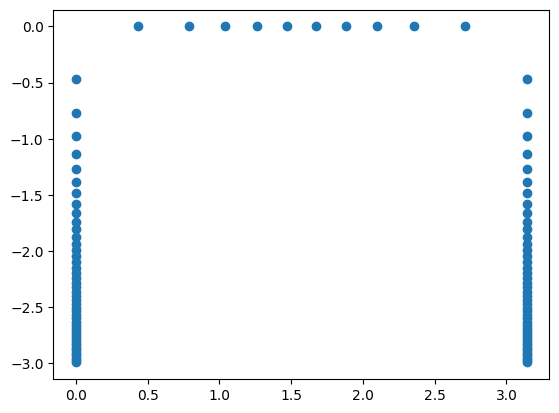

In [276]:
x = np.linspace(-10, 10, 100)
y = np.emath.arccos(x)
plt.scatter(y.real, y.imag)

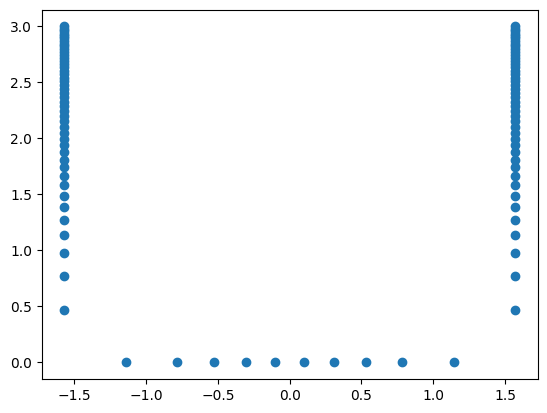

In [277]:
y = np.emath.arcsin(x)
plt.scatter(y.real, y.imag)

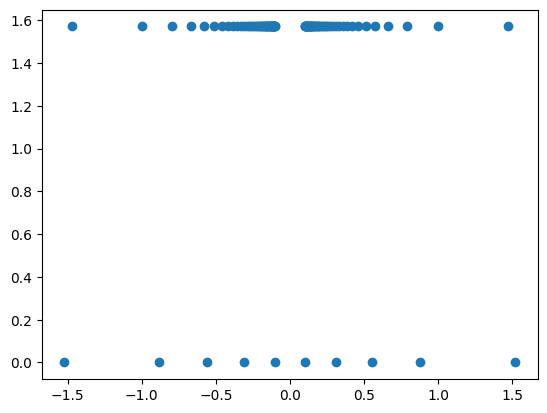

In [279]:
y = np.emath.arctanh(x)
plt.scatter(y.real, y.imag)

## FFT


In [283]:
np.fft.fftfreq(10)
np.fft.fftfreq(11)
np.fft.fftfreq(20)

array([ 0. ,  0.1,  0.2,  0.3,  0.4, -0.5, -0.4, -0.3, -0.2, -0.1])

array([ 0.        ,  0.09090909,  0.18181818,  0.27272727,  0.36363636,
        0.45454545, -0.45454545, -0.36363636, -0.27272727, -0.18181818,
       -0.09090909])

array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
        0.45, -0.5 , -0.45, -0.4 , -0.35, -0.3 , -0.25, -0.2 , -0.15,
       -0.1 , -0.05])

In [286]:
np.fft.rfftfreq(10)
np.fft.rfftfreq(100)
np.fft.rfftfreq(100, 1 / 100)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5])

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 ])

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.])

## Functional


In [288]:
a = np.arange(24).reshape(2, 3, 4)
a
np.apply_over_axes(np.sum, a, [0])
np.apply_over_axes(np.sum, a, [0, 2])

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

array([[[12, 14, 16, 18],
        [20, 22, 24, 26],
        [28, 30, 32, 34]]])

array([[[ 60],
        [ 92],
        [124]]])

In [289]:
b = np.array([[8, 1, 7], [4, 3, 9], [5, 2, 6]])
b
np.apply_along_axis(sorted, 1, b)

array([[8, 1, 7],
       [4, 3, 9],
       [5, 2, 6]])

array([[1, 7, 8],
       [3, 4, 9],
       [2, 5, 6]])

In [292]:
vlen = np.vectorize(len)
a = np.array(["one", "array", "to", "rule", "them", "all", "👁️🔥💍"])
a
vlen(a)

array(['one', 'array', 'to', 'rule', 'them', 'all', '👁️🔥💍'], dtype='<U5')

array([3, 5, 2, 4, 4, 3, 4])

In [293]:
oct_array = np.frompyfunc(oct, 1, 1)
oct_array(np.array((10, 30, 100)))

array(['0o12', '0o36', '0o144'], dtype=object)

In [294]:
x = np.linspace(-2.5, 2.5, 6)
np.piecewise(x, [x < 0, x >= 0], [-1, 1])

array([-1., -1., -1.,  1.,  1.,  1.])

## Random


In [4]:
rng = np.random.default_rng(secrets.randbits(128))
rng
rng.bit_generator
rng.random()
rng.integers(0, 10, size=3)

Generator(PCG64) at 0x7FF74B79C580

0.27127122297814266

array([8, 6, 2])

In [5]:
rng.random(size=10)

array([0.76828912, 0.43308927, 0.82878344, 0.90495892, 0.450557  ,
       0.33143552, 0.07570345, 0.64051254, 0.38264916, 0.86742308])

In [8]:
rng.choice(4, 4)
rng.choice(4, 4, p=[0.7, 0.1, 0.1, 0.1])

array([1, 0, 1, 0])

array([0, 0, 1, 0])

In [6]:
a = np.arange(16)
rng.shuffle(a)
a

array([ 6,  8, 15, 11,  3,  7, 13,  4,  9,  1, 10,  5, 14,  2, 12,  0])

In [12]:
a = np.arange(16)
rng.permuted(a)
a = np.arange(15).reshape((3, 5))
a
rng.permuted(a)
rng.permuted(a, axis=0)
rng.permuted(a, axis=1)

array([ 6,  3, 11,  8, 12,  4,  7, 10,  9, 15,  1,  2, 13,  5,  0, 14])

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

array([[ 4, 11,  1,  6, 13],
       [ 2,  8, 14,  7,  3],
       [ 5,  9,  0, 12, 10]])

array([[ 0,  6,  7, 13,  4],
       [10,  1, 12,  3,  9],
       [ 5, 11,  2,  8, 14]])

array([[ 3,  2,  0,  1,  4],
       [ 5,  8,  6,  9,  7],
       [10, 13, 14, 11, 12]])

In [13]:
# Permute the either the rows or numbers within the rows.
a = np.arange(16)
rng.permutation(a)
a = np.arange(15).reshape((3, 5))
a
rng.permutation(a)
rng.permutation(a, axis=0)
rng.permutation(a, axis=1)

array([ 8,  7,  9,  4,  5,  1,  3,  2, 11, 15, 13, 10, 14,  6, 12,  0])

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

array([[ 5,  6,  7,  8,  9],
       [ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14]])

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [ 5,  6,  7,  8,  9]])

array([[ 3,  4,  0,  1,  2],
       [ 8,  9,  5,  6,  7],
       [13, 14, 10, 11, 12]])

### Distributions


In [9]:
def distplot(data: np.array) -> None:
    """Print distribution density for `data`."""
    sns.histplot(
        data,
        kde=True,
        stat="density",
        kde_kws={"cut": 3},
        alpha=0.4,
        edgecolor=(1, 1, 1, 0.4),
    )

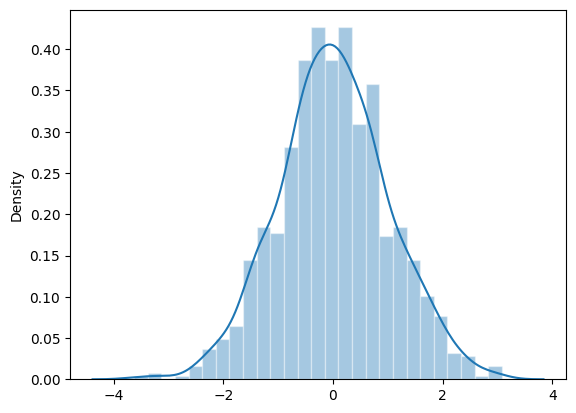

In [26]:
distplot(rng.normal(0, 1, 1000))

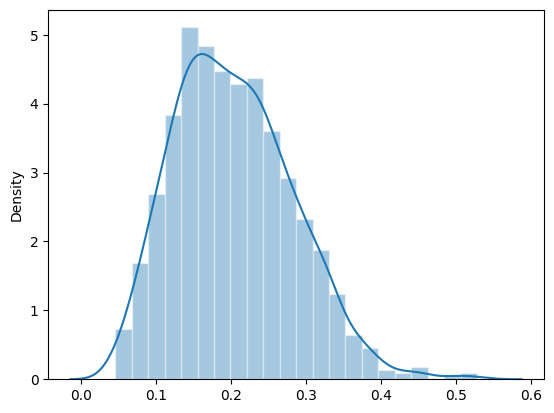

In [29]:
distplot(rng.beta(5, 20, 1000))

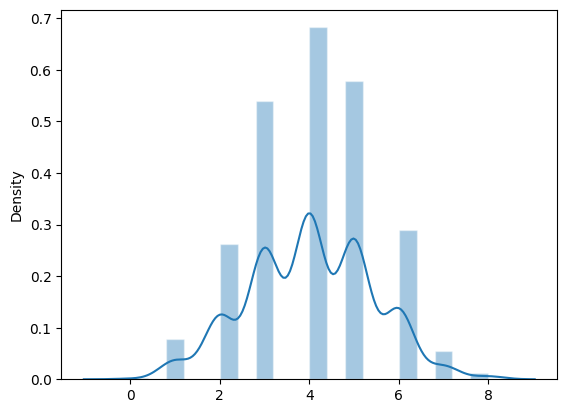

In [47]:
# Result of throwing the coin 10 times (repeated by 1000)
# For n * p > 5 - the normal distribution is better.
distplot(rng.binomial(10, 0.5, 1000))

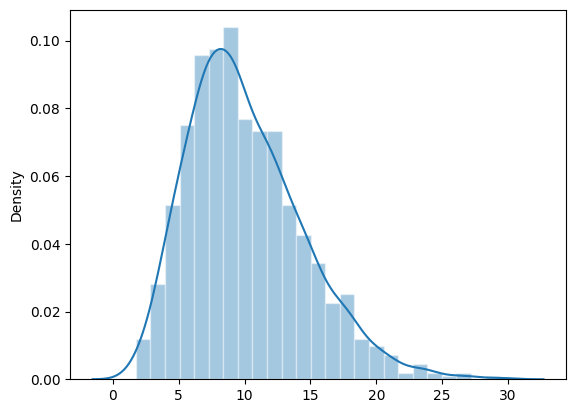

In [49]:
distplot(rng.chisquare(10, 1000))

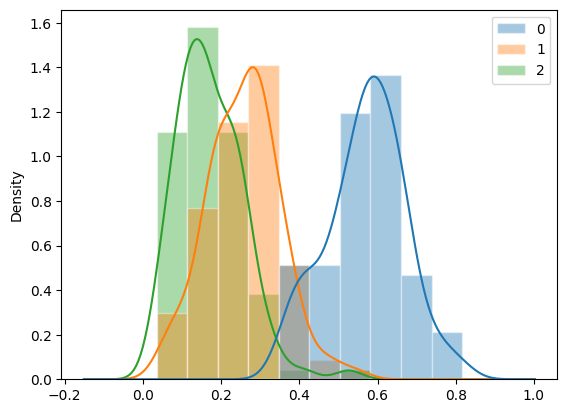

In [50]:
distplot(rng.dirichlet((10, 5, 3), 100))

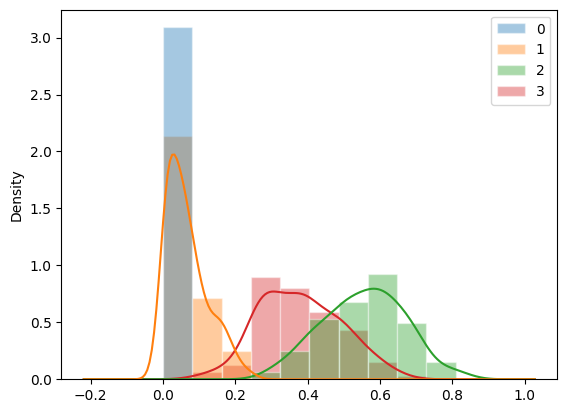

In [57]:
distplot(rng.dirichlet((0, 1, 10, 7), 100))

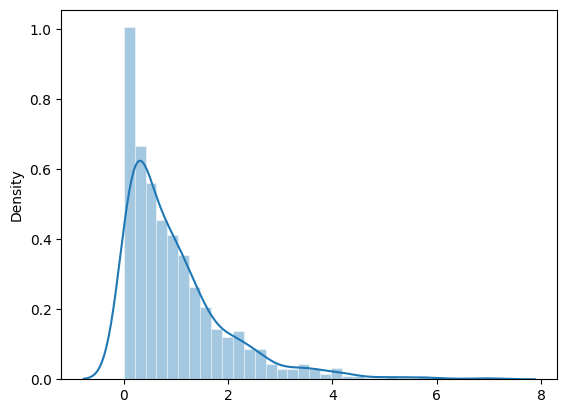

In [61]:
distplot(rng.exponential(1, 1000))

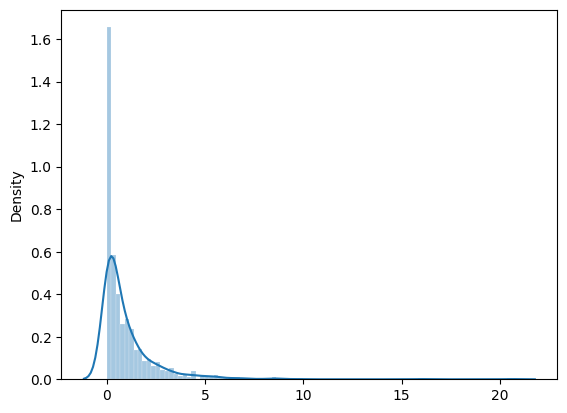

In [62]:
distplot(rng.f(1, 48,  1000))

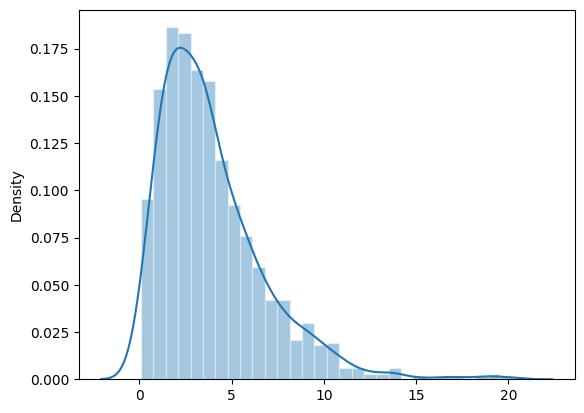

In [63]:
distplot(rng.gamma(2., 2., 1000))

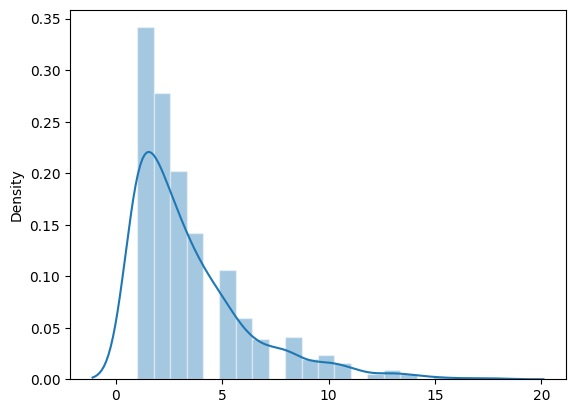

In [64]:
distplot(rng.geometric(0.3, 1000))

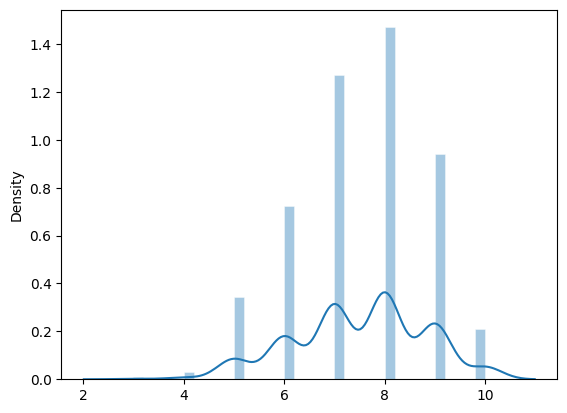

In [68]:
distplot(rng.hypergeometric(75, 25, 10, 1000))

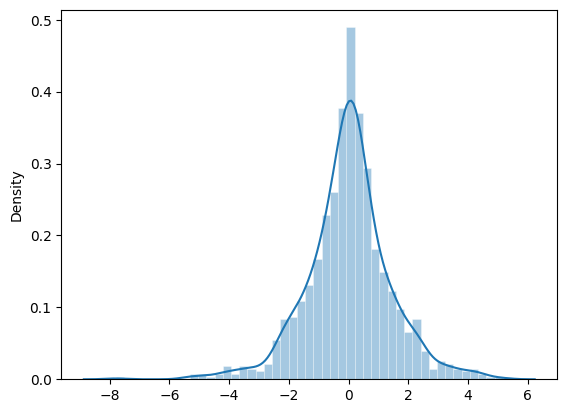

In [70]:
distplot(rng.laplace(0, 1, 1000))

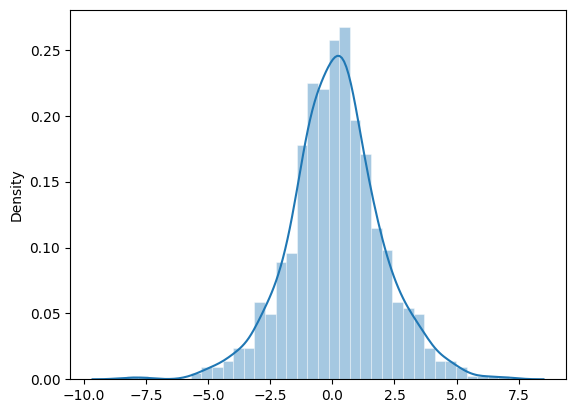

In [71]:
distplot(rng.logistic(0, 1, 1000))

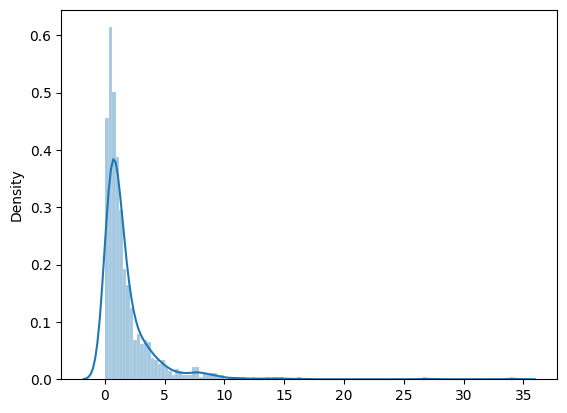

In [72]:
distplot(rng.lognormal(0, 1, 1000))

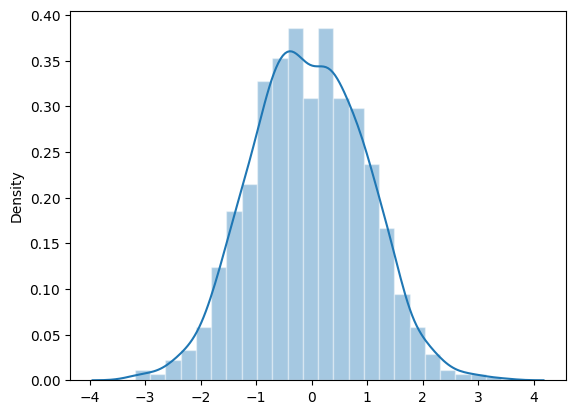

In [14]:
distplot(np.log(rng.lognormal(0, 1, 1000)))


In [ ]:
distplot(rng.multinomial())

## Examples


### Vector QuantizatioN


In [207]:
observation = np.array([121.0, 188.0])  # , [111.0, 188.0]])
codes = np.array([[102.0, 203.0], [132.0, 193.0], [45.0, 155.0], [57.0, 173.0]])
codes.shape
codes - observation
(codes - observation) ** 2
dist = np.sum((codes - observation) ** 2, axis=1)
dist
np.argmin(dist, axis=-1)
codes[np.argmin(dist, axis=-1)]

(4, 2)

array([[-19.,  15.],
       [ 11.,   5.],
       [-76., -33.],
       [-64., -15.]])

array([[ 361.,  225.],
       [ 121.,   25.],
       [5776., 1089.],
       [4096.,  225.]])

array([ 586.,  146., 6865., 4321.])

1

array([132., 193.])